In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
total_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/best_regressor_hyperparameters.xlsx',
                         sheet_name = 'Best OPV',
                         )

total_df = total_df.iloc[:13]
total_df = total_df[['Regressor', 'Data', 'MSE PCE', 'MSE Voc', 'MSE Jsc', 'MSE FF',
       'MAPE PCE', 'MAPE Voc', 'MAPE Jsc', 'MAPE FF', 'R2 PCE', 'R2 Voc',
       'R2 Jsc', 'R2 FF']]

# print(total_df.columns)
# print(total_df)

In [80]:
total_df = total_df.transpose()

total_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Regressor,LASSO1,LASSO2,RF1,RF2,SVM1,SVM2,NN1,NN2,NN3,NN4,NN5,NN6,NN7
Data,OPV AOD,OPV CTD,OPV AOD,OPV CTD,OPV AOD,OPV CTD,OPV AOD,OPV CTD,m2py Labels Only,Image Data Only,m2py Labels and Tabular Data,Image Data and Tabular Data,All Data
MSE PCE,0.06237,0.10749,0.02884,0.18041,0.04081,0.04477,0.61352,0.12654,0.08523,0.008415,0.29468,0.00691,0.09056
MSE Voc,0.00313,0.07203,0.00249,0.19967,0.00497,0.00572,0.21127,0.07344,0.15501,0.007906,2.39624,0.43102,0.10566
MSE Jsc,0.03139,0.07664,0.00662,0.15461,0.0144,0.01749,0.09955,0.12386,0.10108,0.008945,0.25432,0.036938,0.05306
MSE FF,0.03151,0.07788,0.04301,0.10786,0.03971,0.04063,0.10095,0.09086,0,0,0,0,0
MAPE PCE,25.437,32.7219,18.1254,36.1965,22.3596,22.5961,46.203,8711.87,33.703,12.709,64.4728,9.966,33.61
MAPE Voc,5.7209,26.7577,4.84997,32.4234,6.6404,6.4903,346.538,8587.53,30.967,5.909,75.112,3.376,25.362
MAPE Jsc,15.4673,24.3271,7.42301,23.6593,12.9886,13.3664,339.291,43.829,37.293,10.082,57.973,11.916,21.805
MAPE FF,18.0733,26.5511,16.3194,18.1854,18.1343,19.7133,323.262,35.574,32.532,9.829,53.587,6.397,23.319


In [62]:
loss_df = total_df.loc[['MSE PCE', 'MSE Voc', 'MSE Jsc', 'MSE FF']]
acc_df = total_df.loc[['MAPE PCE', 'MAPE Voc', 'MAPE Jsc', 'MAPE FF']]
r2_df = total_df.loc[['R2 PCE', 'R2 Voc', 'R2 Jsc', 'R2 FF']]

loss_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
MSE PCE,0.06237,0.10749,0.02884,0.18041,0.04081,0.04477,0.61352,0.12654,0.08523,0.008415,0.29468,0.00691,0.09056
MSE Voc,0.00313,0.07203,0.00249,0.19967,0.00497,0.00572,0.21127,0.07344,0.15501,0.007906,2.39624,0.43102,0.10566
MSE Jsc,0.03139,0.07664,0.00662,0.15461,0.0144,0.01749,0.09955,0.12386,0.10108,0.008945,0.25432,0.036938,0.05306
MSE FF,0.03151,0.07788,0.04301,0.10786,0.03971,0.04063,0.10095,0.09086,0,0,0,0,0


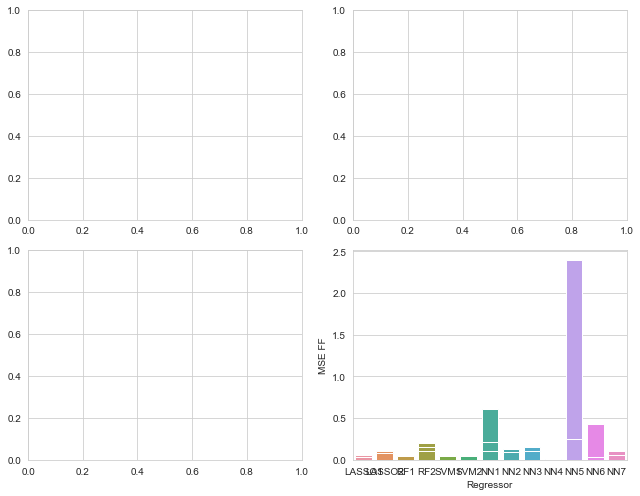

In [78]:
sns.set_style("whitegrid")

x = total_df.loc['Regressor']

fig, axs = plt.subplots(2, 2, figsize = (9, 7))

pce_loss = sns.barplot(x = x, y = loss_df.loc['MSE PCE'], data = loss_df)
voc_loss = sns.barplot(x = x, y = loss_df.loc['MSE Voc'], data = loss_df)
jsc_loss = sns.barplot(x = x, y = loss_df.loc['MSE Jsc'], data = loss_df)
ff_loss = sns.barplot(x = x, y = loss_df.loc['MSE FF'], data = loss_df)
plt.tight_layout()

plt.show()

In [5]:
total_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/best_regressor_hyperparameters.xlsx',
                         sheet_name = 'Sheet2',
                         )

print(total_df.columns)

total_df = total_df[['Regressor', 'Metric', 'Avg MSE', 'Best MSE', 'Avg MAPE',
                     'Best MAPE', 'Avg R2', 'Best R2']]

total_df

Index(['Regressor', 'Metric', 'Avg MSE', 'Best MSE', 'Avg MAPE', 'Best MAPE',
       'Avg R2', 'Best R2', 'Unnamed: 8', 'MSE PCE', 'MSE Voc', 'MSE Jsc',
       'MSE FF', 'MAPE PCE', 'MAPE Voc', 'MAPE Jsc', 'MAPE FF', 'R2 PCE',
       'R2 Voc', 'R2 Jsc', 'R2 FF'],
      dtype='object')


,Regressor,Metric,Avg MSE,Best MSE,Avg MAPE,Best MAPE,Avg R2,Best R2
0,LASSO1,PCE,NaN,0.062370,NaN,25.43700,NaN,0.00000
1,LASSO1,Voc,NaN,0.003130,NaN,5.72090,NaN,0.00000
2,LASSO1,Jsc,NaN,0.031390,NaN,15.46730,NaN,0.00000
3,LASSO1,FF,NaN,0.031510,NaN,18.07330,NaN,-16.59800
4,LASSO2,PCE,NaN,0.107490,NaN,32.72190,NaN,-1.98910
5,LASSO2,Voc,NaN,0.072030,NaN,26.75770,NaN,-1.35050
6,LASSO2,Jsc,NaN,0.076640,NaN,24.32710,NaN,-1.55380
7,LASSO2,FF,NaN,0.077880,NaN,26.55110,NaN,-1.86400
8,RF1,PCE,NaN,0.028840,NaN,18.12540,NaN,-0.52710
9,RF1,Voc,NaN,0.002490,NaN,4.84997,NaN,0.00000


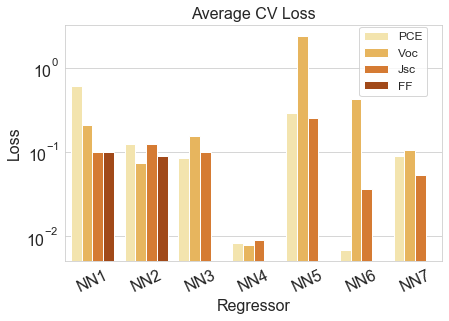

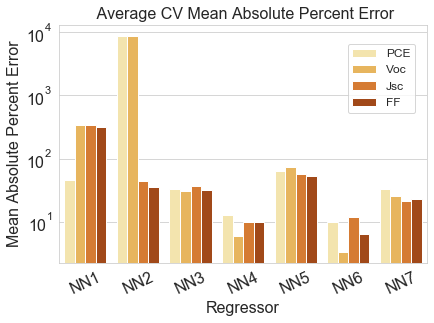

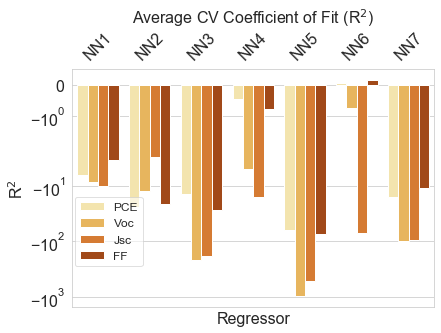

In [49]:
rc = {'axes.spines.left': True,
      'axes.spines.bottom': True,
      'axes.spines.right': True,
      'axes.spines.top': True,
      'font.family': 'sans-serif',}

sns.set_style('whitegrid', rc)

loss_plot = sns.catplot(x = 'Regressor', y = 'Avg MSE',
                        hue = 'Metric', data = total_df.iloc[24:],
                        height = 4, aspect = 1.5,
                        kind = 'bar', palette = 'YlOrBr', legend = False)
loss_plot.ax.set_yscale('log')
loss_plot.ax.set_xlabel('Regressor', fontsize = 16)
loss_plot.ax.set_ylabel('Loss', fontsize = 16)
loss_plot.ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 25)
loss_plot.ax.tick_params(axis = 'y', labelsize = 16)
loss_plot.despine(top = False, bottom = False, left = False, right = False)
loss_plot.fig.legend(loc = (0.8, 0.7), fontsize = 12)
loss_plot.ax.set_title('Average CV Loss', fontsize = 16)
loss_plot.savefig('/Users/wesleytatum/Desktop/Avg_CV_Loss.png')

acc_plot = sns.catplot(x = 'Regressor', y = 'Avg MAPE',
                        hue = 'Metric', data = total_df.iloc[24:],
                        height = 4, aspect = 1.5,
                        kind = 'bar', palette = 'YlOrBr', legend = False)
acc_plot.ax.set_yscale('log')
acc_plot.ax.set_xlabel('Regressor', fontsize = 16)
acc_plot.ax.set_ylabel('Mean Absolute Percent Error', fontsize = 16)
acc_plot.ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 25)
acc_plot.ax.tick_params(axis = 'y', labelsize = 16)
acc_plot.despine(top = False, bottom = False, left = False, right = False)
acc_plot.fig.legend(loc = (0.8, 0.65), fontsize = 12)
acc_plot.ax.set_title(' Average CV Mean Absolute Percent Error', fontsize = 16)
acc_plot.savefig('/Users/wesleytatum/Desktop/Avg_CV_MAPE.png')

r2_plot = sns.catplot(x = 'Regressor', y = 'Avg R2',
                        hue = 'Metric', data = total_df.iloc[24:],
                        height = 4, aspect = 1.5,
                        kind = 'bar', palette = 'YlOrBr', legend = False)
r2_plot.ax.set_yscale('symlog')
r2_plot.ax.set_xlabel('Regressor', fontsize = 16)
r2_plot.ax.set_ylabel('R$^{2}$', fontsize = 16)
r2_plot.ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 45,
                       labeltop = True, labelbottom = False)
r2_plot.despine(top = False, bottom = False, left = False, right = False)
r2_plot.ax.tick_params(axis = 'y', labelsize = 16)
r2_plot.fig.legend(loc = (0.17, 0.2), fontsize = 12, framealpha = 0.6)
r2_plot.ax.set_title('Average CV Coefficient of Fit (R$^{2}$)', fontsize = 16)
r2_plot.savefig('/Users/wesleytatum/Desktop/Avg_CV_R2.png')

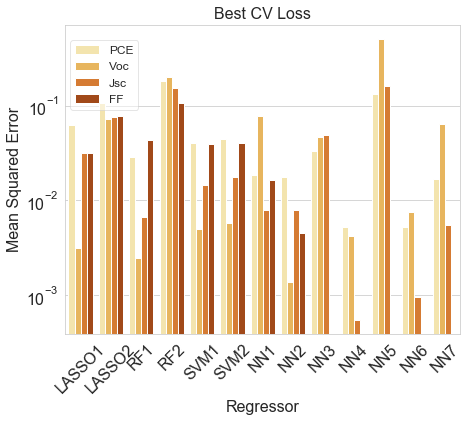

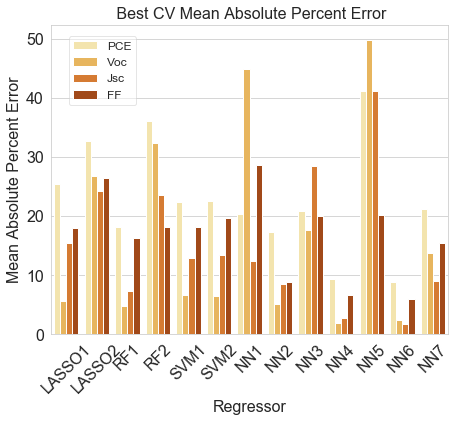

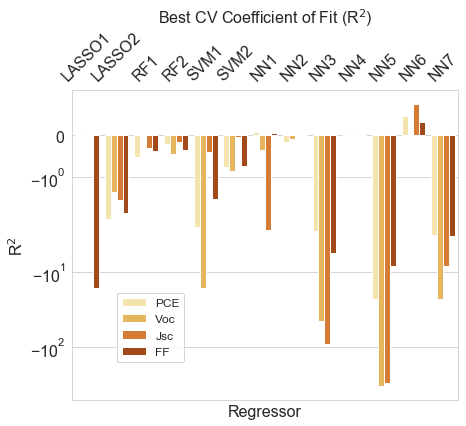

In [48]:
rc = {'font.family': 'sans-serif',}

sns.set_style('whitegrid', rc)

loss_plot = sns.catplot(x = 'Regressor', y = 'Best MSE',
                        hue = 'Metric', data = total_df,
                        height = 5, aspect = 1.25,
                        kind = 'bar', palette = 'YlOrBr', legend = False)
loss_plot.ax.set_yscale('log')
loss_plot.ax.set_xlabel('Regressor', fontsize = 16)
loss_plot.ax.set_ylabel('Mean Squared Error', fontsize = 16)
loss_plot.ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 45)
loss_plot.ax.tick_params(axis = 'y', labelsize = 16)
loss_plot.despine(top = False, bottom = False, left = False, right = False)
loss_plot.fig.legend(loc = (0.15, 0.74), fontsize = 12, framealpha = 0.5)
loss_plot.ax.set_title('Best CV Loss', fontsize = 16)
loss_plot.savefig('/Users/wesleytatum/Desktop/Best_CV_Loss.png')

acc_plot = sns.catplot(x = 'Regressor', y = 'Best MAPE',
                        hue = 'Metric', data = total_df,
                        height = 5, aspect = 1.25,
                        kind = 'bar', palette = 'YlOrBr', legend = False)
# acc_plot.ax.set_yscale('log')
acc_plot.ax.set_xlabel('Regressor', fontsize = 16)
acc_plot.ax.set_ylabel('Mean Absolute Percent Error', fontsize = 16)
acc_plot.ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 45)
acc_plot.ax.tick_params(axis = 'y', labelsize = 16)
acc_plot.despine(top = False, bottom = False, left = False, right = False)
acc_plot.fig.legend(loc = (0.15, 0.75), fontsize = 12, framealpha = 0.5)
acc_plot.ax.set_title(' Best CV Mean Absolute Percent Error', fontsize = 16)
acc_plot.savefig('/Users/wesleytatum/Desktop/Best_CV_MAPE.png')

r2_plot = sns.catplot(x = 'Regressor', y = 'Best R2',
                        hue = 'Metric', data = total_df,
                        height = 5, aspect = 1.25,
                        kind = 'bar', palette = 'YlOrBr', legend = False)
# r2_plot.ax.set_ylim(-10, 1)
r2_plot.ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 45,
                       labeltop = True, labelbottom = False)
r2_plot.ax.set_yscale('symlog')
r2_plot.ax.set_xlabel('Regressor', fontsize = 16)
r2_plot.ax.set_ylabel('R$^{2}$', fontsize = 16)
r2_plot.despine(top = False, bottom = False, left = False, right = False)
r2_plot.ax.tick_params(axis = 'y', labelsize = 16)
r2_plot.fig.legend(loc = (0.25, 0.15), fontsize = 12)
r2_plot.ax.set_title('Best CV Coefficient of Fit (R$^{2}$)', fontsize = 16)
r2_plot.savefig('/Users/wesleytatum/Desktop/Best_CV_R2.png')